# Homework #2 (option #2) - Image 2

## Haesook Ma

**Homework2: Pick 3 of your own images and create a visualization that shows how *similar/different* these images are using these histogramming methods presented in class.**

While I was preparing for my Weekly Viz Report #1, I found an interesting image, so I decided to analyze it. The image is about the COVID-19 vaccine distribution status by state. The image only shows the share of population that has got at least one shot by state. Through the analysis, I am expecting to see how many percentage of the population has got their first shot. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

In [3]:
im2 = Image.open("Vaccine.png") # saved the image in the local 

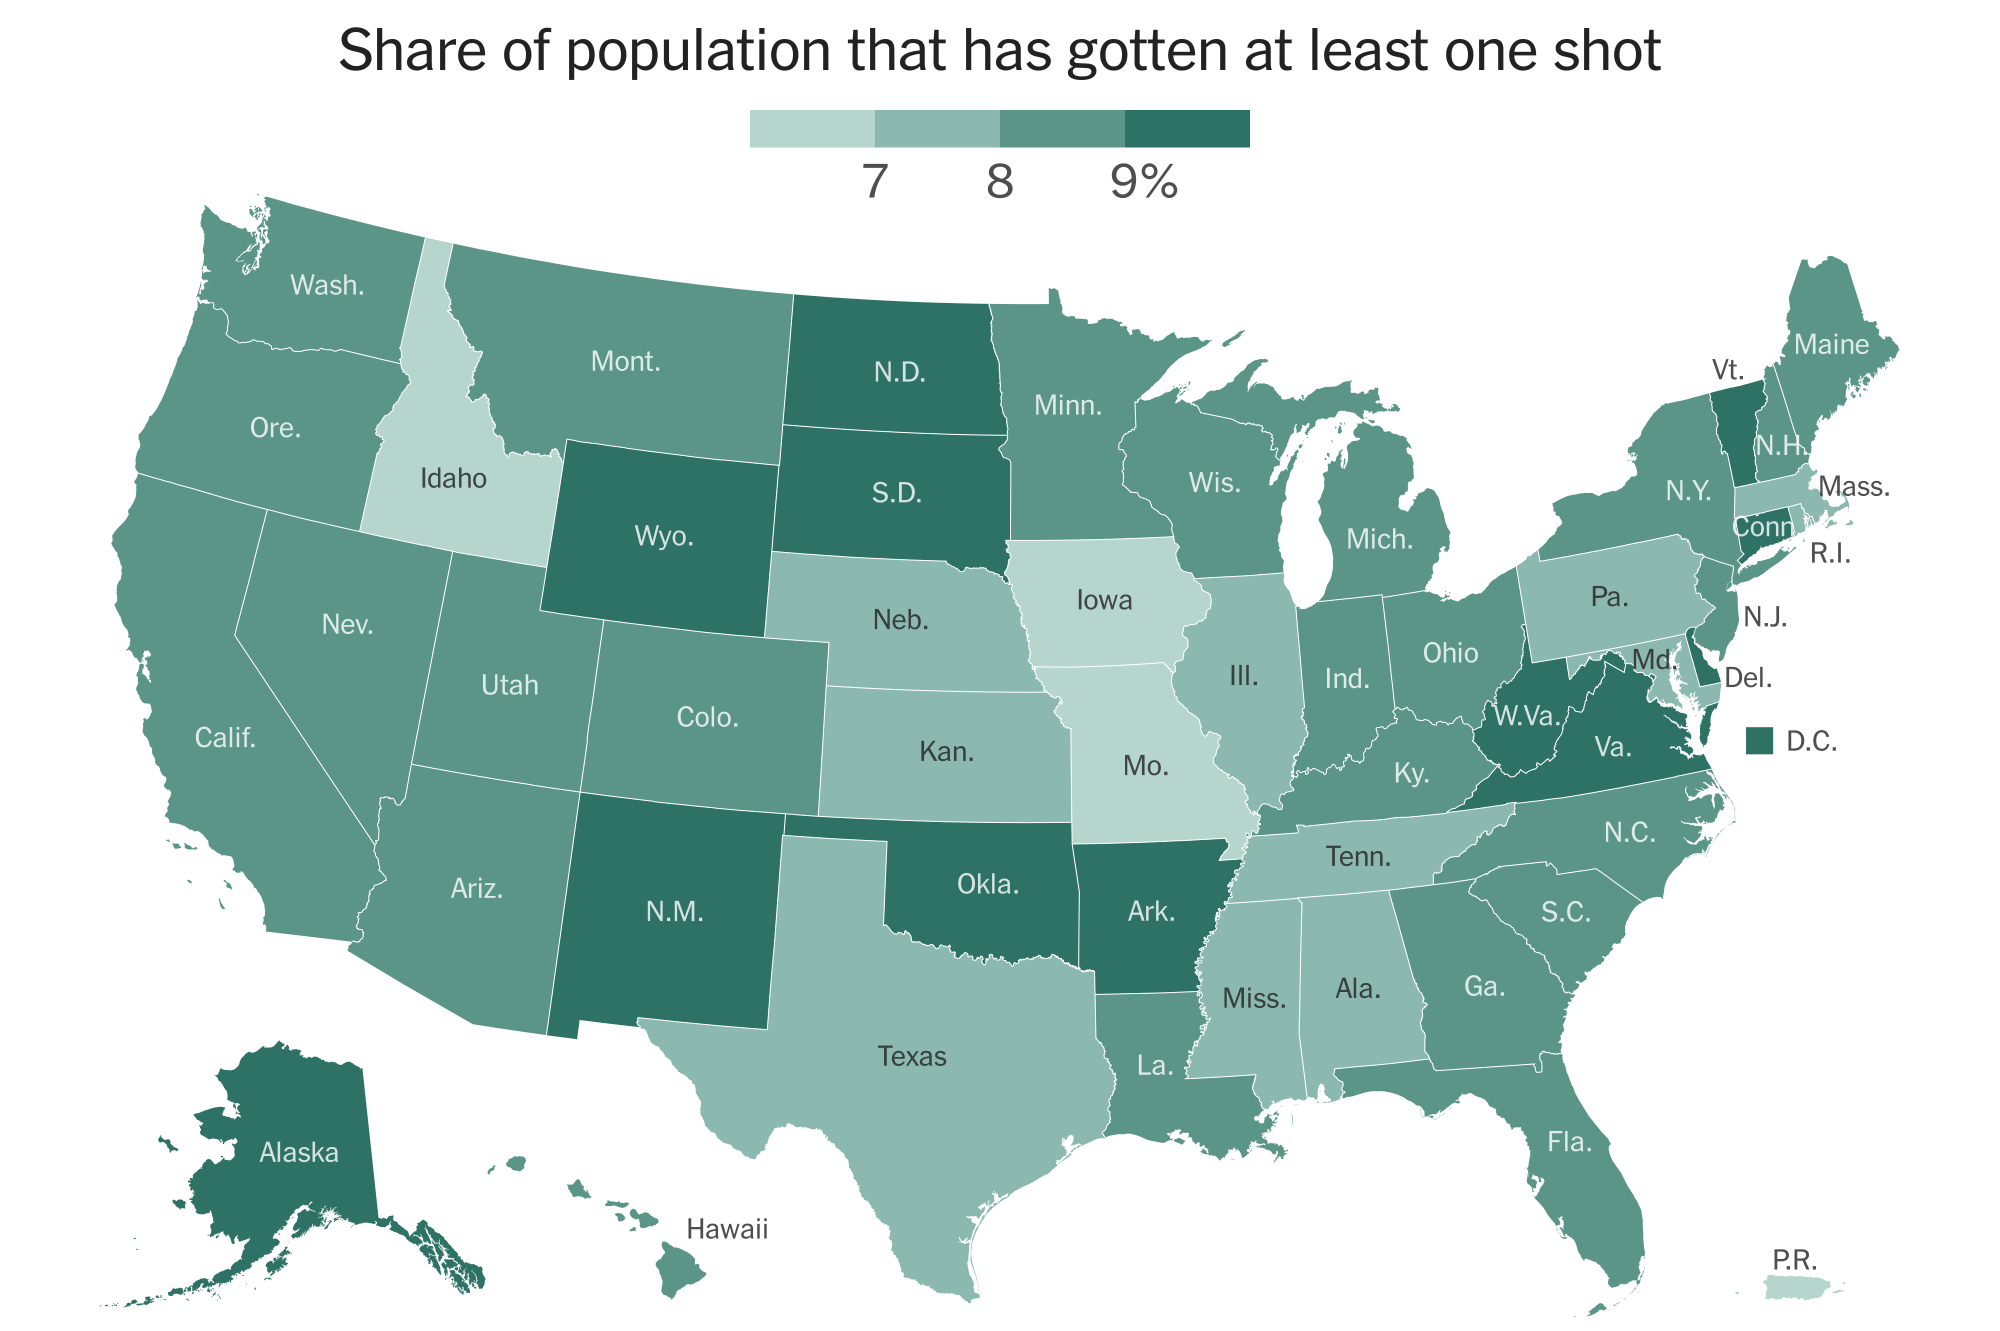

In [4]:
im2

In [5]:
im2_data = np.array(im2)

In [6]:
im2_data

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [7]:
im2_data.shape

(1331, 2000, 4)

In [9]:
im2_data.shape[2]

4

In [10]:
np.unique(im2_data)

array([ 34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

## After checking the number of colors in the image
I discovered there are many colors in the image. Thus, I decided to use the following code to covert the image with *5 colors:*

In [11]:
import scipy
import scipy.misc
import scipy.cluster

# NOTE: I copied the following code from the professor's notebook.
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [15]:
new_im2, new_rgbs = convert_image(im2, ncolors = 5)

finding 5 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[185.1338842  214.44732533 206.42741116]
 [254.74177295 254.83038368 254.80956551]
 [ 46.30124279 109.16248544  97.1385333 ]
 [140.2387315  184.65647455 174.77871848]
 [ 90.26678286 148.94717776 135.0378561 ]]


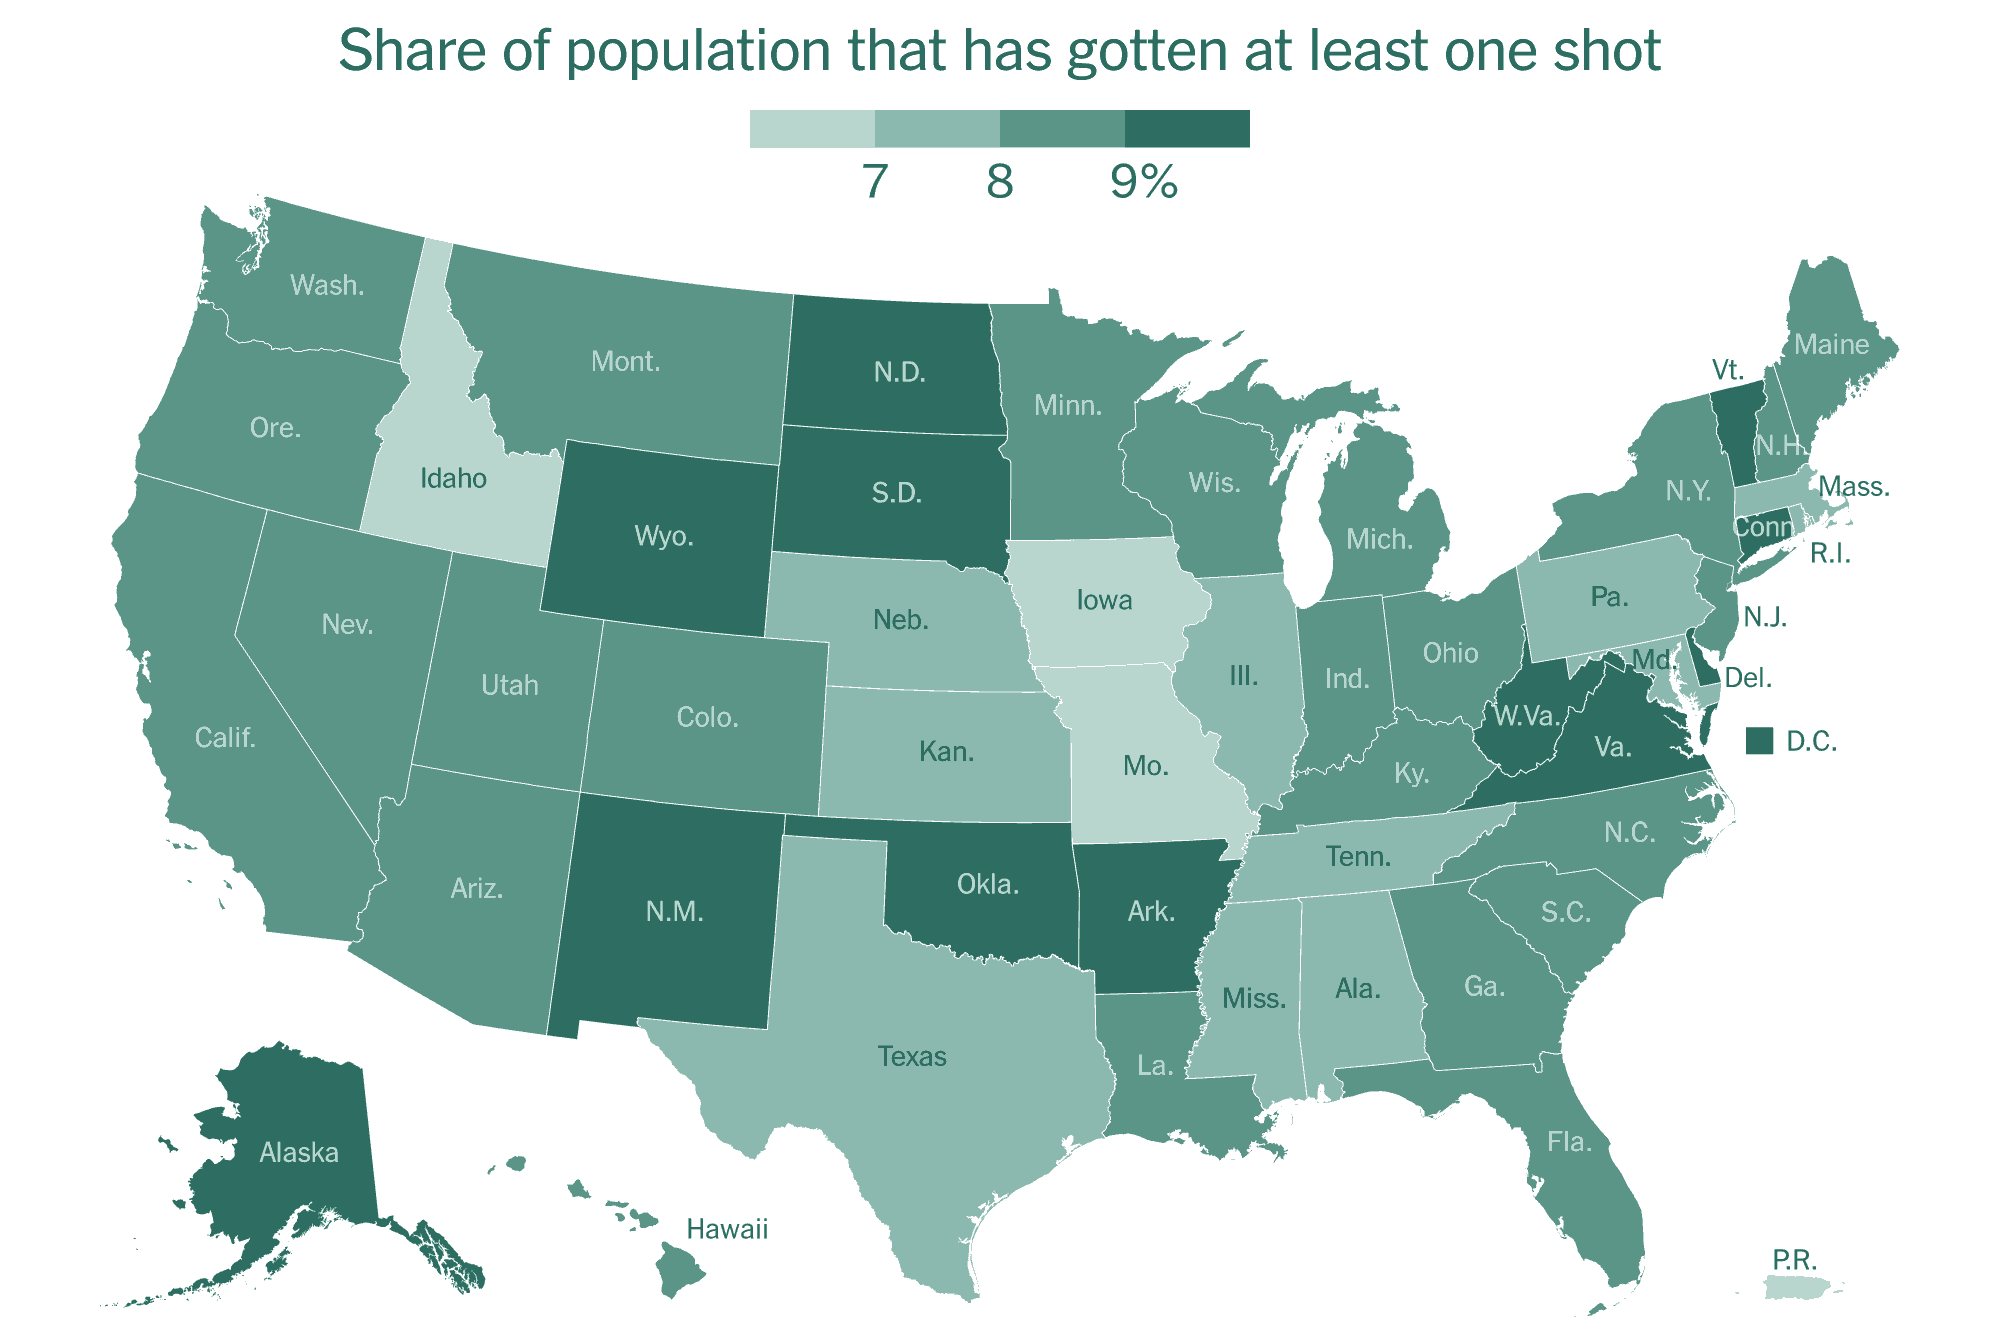

In [16]:
new_im2

In [17]:
new_im2_data = np.array(new_im2)

In [18]:
new_im2_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [20]:
new_im2_data.shape

(1331, 2000, 3)

In [21]:
np.unique(new_im2_data)

array([ 46,  90,  97, 109, 135, 140, 149, 175, 185, 206, 214, 255],
      dtype=uint8)

In [22]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(new_im2_data.shape[2]) :
    print('channel = ', channel_labels[i], ', unique values = ', np.unique(new_im2_data[:,:,i]))

channel =  R , unique values =  [ 46  90 140 185 255]
channel =  G , unique values =  [109 149 185 214 255]
channel =  B , unique values =  [ 97 135 175 206 255]


In [23]:
new_im2_data.reshape(-1, new_im2_data.shape[2])

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [26]:
new_im2_data.reshape(-1, new_im2_data.shape[2]).shape

(2662000, 3)

In [27]:
np.unique(new_im2_data.reshape(-1, new_im2_data.shape[2]), axis = 0)

array([[ 46, 109,  97],
       [ 90, 149, 135],
       [140, 185, 175],
       [185, 214, 206],
       [255, 255, 255]], dtype=uint8)

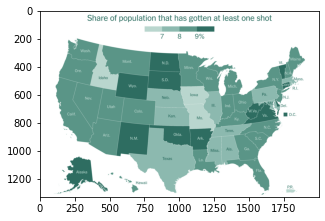

In [28]:
fig, ax = plt.subplots(figsize=(5,5)) # generating figure & axis objects

ax.imshow(new_im2_data) # using the matplotlib imshow function to plot image data

plt.show() # showing the image

## Color sorting
There are 5 colors including white. However, white is a color of the background, so I will not include white in my further analysis.

In [39]:
# [46, 109,  97], color code = #2e6d61 bold4
pixel_p9plus = (new_im2_data[:,:,0] == 46) & (new_im2_data[:,:,1] == 109) & (new_im2_data[:,:, 2] == 97) 

# [90, 149, 135], color code = #5a9587 bold3
pixel_p8to9 = (new_im2_data[:,:,0] == 90) & (new_im2_data[:,:,1] == 149) & (new_im2_data[:,:, 2] == 135) 

# [140, 185, 175], color code = # 8cb9af bold2
pixel_p7to8 = (new_im2_data[:,:,0] == 140) & (new_im2_data[:,:,1] == 185) & (new_im2_data[:,:, 2] == 175)

# [185, 214, 206], color code = # b9d6ce bold1
pixel_p7below = (new_im2_data[:,:,0] == 185) & (new_im2_data[:,:,1] == 214) & (new_im2_data[:,:, 2] == 206)

# [255, 255, 255], color = white
pixel_white = (new_im2_data[:,:,0] == 255) & (new_im2_data[:,:,1] == 255) & (new_im2_data[:,:, 2] == 255)

In [40]:
p9plus = len(new_im2_data[pixel_p9plus])
p8to9 = len(new_im2_data[pixel_p8to9])
p7to8 = len(new_im2_data[pixel_p7to8])
p7below = len(new_im2_data[pixel_p7below])
white = len(new_im2_data[pixel_white])

In [41]:
p9plus, p8to9, p7to8, p7below, white

(267437, 594555, 273271, 111751, 1414986)

## Let's check the percentage of each cateogory.

There are four categories; more than 9%, between 8% to 9%, between 7% to 8%, and 7% below. 

According to the following calculation, here are the percentage of each category.
  - More than 9% : 21.45%
  - Between 8% to 9% : 47.68%
  - Between 7& to 8% : 21.91%
  - 7% below : 8.96%

In [33]:
total_p = p9plus + p8to9 + p7to8 + p7below

In [34]:
p_p9plus = p9plus / total_p
p_p8to9 = p8to9 / total_p
p_p7to8 = p7to8 / total_p
p_p7below = p7below / total_p

In [36]:
p_p9plus, p_p8to9, p_p7to8, p_p7below

(0.21446190660249204,
 0.47678293908488595,
 0.21914028230637347,
 0.08961487200624853)

## The barchart of the result

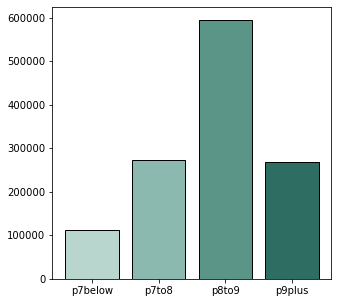

In [37]:
fig, ax = plt.subplots(figsize=(5,5))

labels = np.array(['p7below', 'p7to8', 'p8to9', 'p9plus']) # labels for our x-axis
values = np.array([p7below, p7to8, p8to9, p9plus]) # heights for our y-axis

colors = np.array(['#b9d6ce', '#8cb9af', '#5a9587', '#2e6d61'])

myBarChart = ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')
    
plt.show()

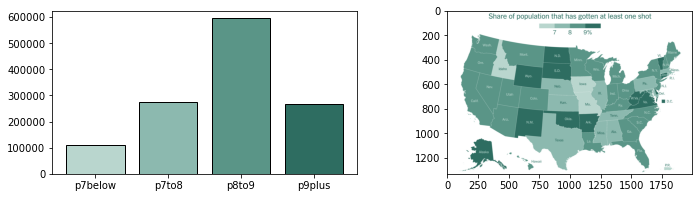

In [38]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

labels = np.array(['p7below', 'p7to8', 'p8to9', 'p9plus']) # labels for our x-axis
values = np.array([p7below, p7to8, p8to9, p9plus]) # heights for our y-axis

colors = np.array(['#b9d6ce', '#8cb9af', '#5a9587', '#2e6d61'])

myBarChart = ax[0].bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')

#also plot image
ax[1].imshow(new_im2_data)
    
plt.show()

## To conclude

There are several similaries and differences between my image and the Stitch image. 

(1) I chose this image because the image itself seemed interesting and the set of color was appropriate for my analysis. My first image, the Ryan, was also interesting to analyze, but the color did not have any meaning. However, in this image, each color had a meaning just like the Stitch image. 

(2) However, when analyzing the Stitch image, we included the background and black boundary color in our analysis. But in my case, I did not include the background color so that I could focus more on the purpose of my analysis. 